In [48]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astroquery.ned import Ned
import astropy.units as u
from astropy import coordinates
from astropy.coordinates import SkyCoord
import pandas as pd
%matplotlib inline

In [2]:
from matplotlib.transforms import Affine2D
from matplotlib.projections import PolarAxes
from mpl_toolkits.axisartist import angle_helper
from mpl_toolkits.axisartist.grid_finder import MaxNLocator
from mpl_toolkits.axisartist.floating_axes import GridHelperCurveLinear, FloatingSubplot


def fractional_polar_axes(f, thlim=(0, 180), rlim=(0, 1), step=(30, 0.2),
                          thlabel='theta', rlabel='r', ticklabels=True):
    """Return polar axes that adhere to desired theta (in deg) and r limits. steps for theta
    and r are really just hints for the locators. Using negative values for rlim causes
    problems for GridHelperCurveLinear for some reason"""
    th0, th1 = thlim # deg
    r0, r1 = rlim
    thstep, rstep = step

    # scale degrees to radians:
    tr_scale = Affine2D().scale(np.pi/180., 1.)
    tr = tr_scale + PolarAxes.PolarTransform()
    theta_grid_locator = angle_helper.LocatorDMS((th1-th0) // thstep)
    r_grid_locator = MaxNLocator((r1-r0) // rstep)
    theta_tick_formatter = angle_helper.FormatterDMS()
    grid_helper = GridHelperCurveLinear(tr,
                                        extremes=(th0, th1, r0, r1),
                                        grid_locator1=theta_grid_locator,
                                        grid_locator2=r_grid_locator,
                                        tick_formatter1=theta_tick_formatter,
                                        tick_formatter2=None)

    a = FloatingSubplot(f, 111, grid_helper=grid_helper)
    f.add_subplot(a)

    # adjust x axis (theta):
    a.axis["bottom"].set_visible(False)
    a.axis["top"].set_axis_direction("bottom") # tick direction
    a.axis["top"].toggle(ticklabels=ticklabels, label=bool(thlabel))
    a.axis["top"].major_ticklabels.set_axis_direction("top")
    a.axis["top"].label.set_axis_direction("top")

    # adjust y axis (r):
    a.axis["left"].set_axis_direction("bottom") # tick direction
    a.axis["right"].set_axis_direction("top") # tick direction
    a.axis["left"].toggle(ticklabels=ticklabels, label=bool(rlabel))

    # add labels:
    a.axis["top"].label.set_text(thlabel)
    a.axis["left"].label.set_text(rlabel)

    # create a parasite axes whose transData is theta, r:
    auxa = a.get_aux_axes(tr)
    # make aux_ax to have a clip path as in a?:
    auxa.patch = a.patch 
    # this has a side effect that the patch is drawn twice, and possibly over some other
    # artists. So, we decrease the zorder a bit to prevent this:
    a.patch.zorder = -2

    # add sector lines for both dimensions:
    thticks = grid_helper.grid_info['lon_info'][0]
    rticks = grid_helper.grid_info['lat_info'][0]
    for th in thticks[1:-1]: # all but the first and last
        auxa.plot([th, th], [r0, r1], '--', c='grey', zorder=-1)
    for ri, r in enumerate(rticks):
        # plot first r line as axes border in solid black only if it isn't at r=0
        if ri == 0 and r != 0:
            ls, lw, color = 'solid', 2, 'black'
        else:
            ls, lw, color = 'dashed', 1, 'grey'
        # From http://stackoverflow.com/a/19828753/2020363
        auxa.add_artist(plt.Circle([0, 0], radius=r, ls=ls, lw=lw, color=color, fill=False,
                        transform=auxa.transData._b, zorder=-1))
    return auxa


In [24]:
co = coordinates.SkyCoord(ra=56.38, dec=38.43,
                          unit=(u.deg, u.deg), frame='fk4')
result_table = Ned.query_region(co, radius=2 * u.deg, equinox='B2000.0')
print(result_table)




No.          Object Name          ... Diameter Points Associations
                                  ...                             
---- ---------------------------- ... --------------- ------------
   1 GALEXASC J033837.35+383244.1 ...               0            0
   2 GALEXASC J033837.94+383052.2 ...               0            0
   3 GALEXASC J033838.09+382609.2 ...               0            0
   4 GALEXASC J033838.47+382622.2 ...               0            0
   5          NVSS J033838+384322 ...               0            0
   6 GALEXASC J033839.31+383723.2 ...               0            0
   7 GALEXASC J033839.40+384837.6 ...               0            0
   8      2MASX J03383949+3846159 ...               2            0
   9 GALEXASC J033839.90+384356.5 ...               0            0
  10 GALEXASC J033839.97+384444.6 ...               0            0
 ...                          ... ...             ...          ...
7901      2MASX J03582350+3902175 ...               2         

In [14]:
dir(result_table['Redshift'])

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getslice__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__idiv__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',


In [25]:
np.where(~result_table['Redshift'].data.mask)

(array([ 230,  248,  299,  349,  439,  512,  556,  776, 1019, 1096, 1187,
        1199, 1398, 1530, 1534, 1823, 1887, 1979, 2028, 2262, 2326, 2551,
        2658, 2987, 3044, 3069, 3281, 3369, 3395, 3802, 4708, 4716, 4961,
        4967, 5259, 5787, 5856, 5974, 6798, 7464, 7481, 7483, 7489, 7491,
        7519, 7580, 7632, 7677, 7684, 7833, 7850, 7881]),)

In [38]:
float('+124.424')

124.424

In [41]:
tbl = pd.read_table('/Users/spardy/Downloads/vizier_votable.tsv', delimiter=';',
                    dtype={'RAJ2000': float, 'DEJ2000': float, 'cz': float})

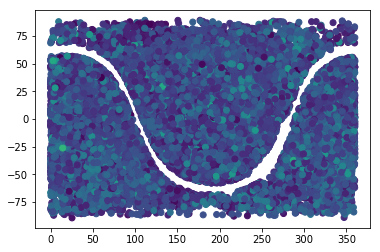

In [44]:
plt.scatter(tbl.RAJ2000, tbl.DEJ2000, c=tbl.cz)

(array([  8.30000000e+03,   2.00240000e+04,   1.07200000e+04,
          3.57400000e+03,   7.67000000e+02,   1.25000000e+02,
          1.60000000e+01,   4.00000000e+00,   1.00000000e+00,
          2.00000000e+00]),
 array([  -300. ,   4916.4,  10132.8,  15349.2,  20565.6,  25782. ,
         30998.4,  36214.8,  41431.2,  46647.6,  51864. ]),
 <a list of 10 Patch objects>)

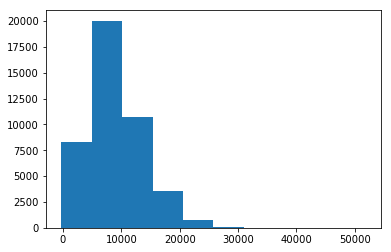

In [50]:
plt.hist(tbl[tbl.cz == tbl.cz].cz)

/Users/spardy/anaconda/lib/python3.6/site-packages/matplotlib/projections/polar.py:65: RuntimeWarning: invalid value encountered in less
  mask = r < 0


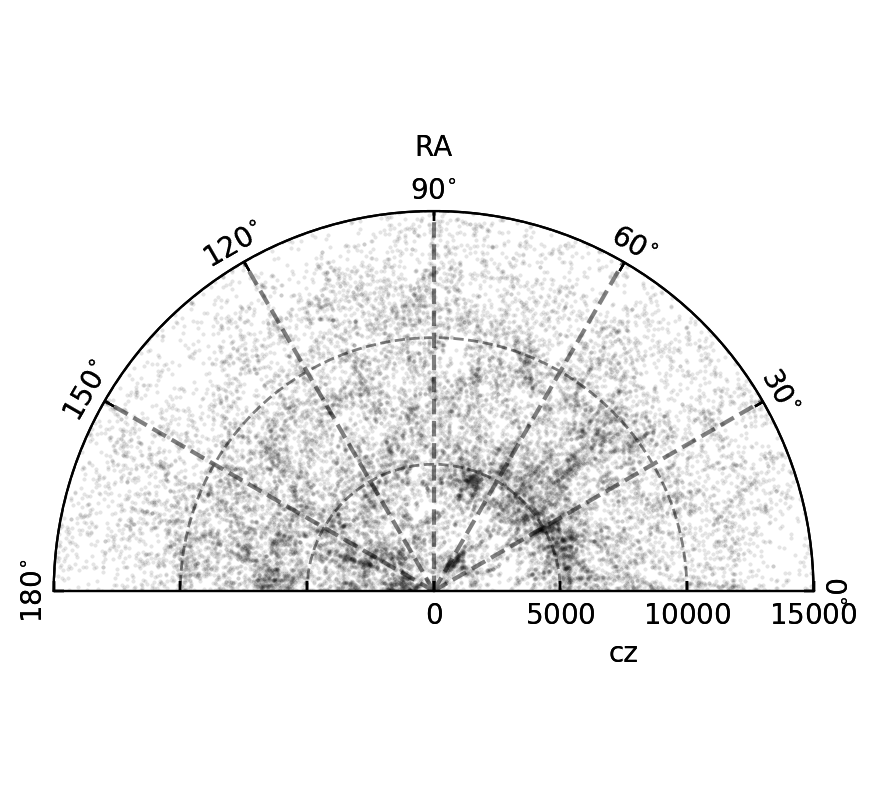

In [68]:
fig = plt.figure(figsize=(5, 5), dpi=200)
ax = fractional_polar_axes(fig, thlim=(0, 180), rlim=(0, 15000),
                           step=(30, 5000), thlabel='RA', rlabel='cz')
ax.plot(tbl.RAJ2000, tbl.cz, 'k.', alpha=0.1, markersize=1)
#ax.set_rmax(15000)


In [5]:
tbl = pd.read_table('/Users/spardy/Data/2df_redshifts.tsv', delimiter=';')

In [7]:
tbl.head()

,RAJ2000,DEJ2000,z
0,00 14 27.05,-32 16 14.6,0.2981
1,00 14 30.55,-32 58 00.7,0.1228
2,00 14 20.71,-32 23 16.8,0.1038
3,00 14 24.47,-32 29 47.6,0.2065
4,00 14 25.92,-32 42 41.5,0.1036


In [25]:
coords = SkyCoord(ra=tbl.RAJ2000, dec=tbl.DEJ2000, unit=(u.hourangle, u.deg))

/Users/spardy/anaconda/lib/python3.6/site-packages/matplotlib/projections/polar.py:65: RuntimeWarning: invalid value encountered in less
  mask = r < 0


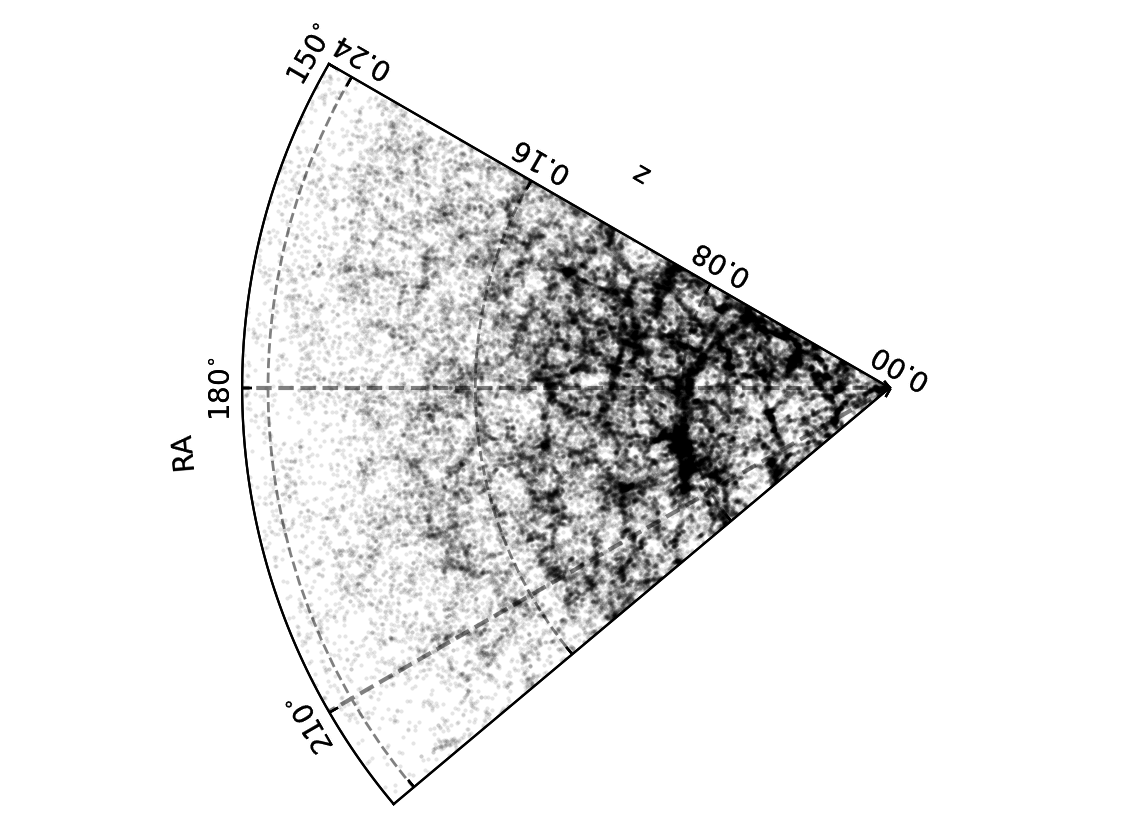

In [64]:
fig = plt.figure(figsize=(7, 5), dpi=200)
ax = fractional_polar_axes(fig, thlim=(150, 220), rlim=(0, 0.25),
                           step=(30, 0.05), thlabel='RA', rlabel='z')
ax.plot(coords.ra.value, tbl.z, 'k.', alpha=0.1, markersize=1)
#ax.set_rmax(15000)

#fig.tight_layout()
fig.savefig('/Users/spardy/Desktop/2df_plot1.png', dpi=600, bbox_inches='tight')

/Users/spardy/anaconda/lib/python3.6/site-packages/matplotlib/projections/polar.py:65: RuntimeWarning: invalid value encountered in less
  mask = r < 0


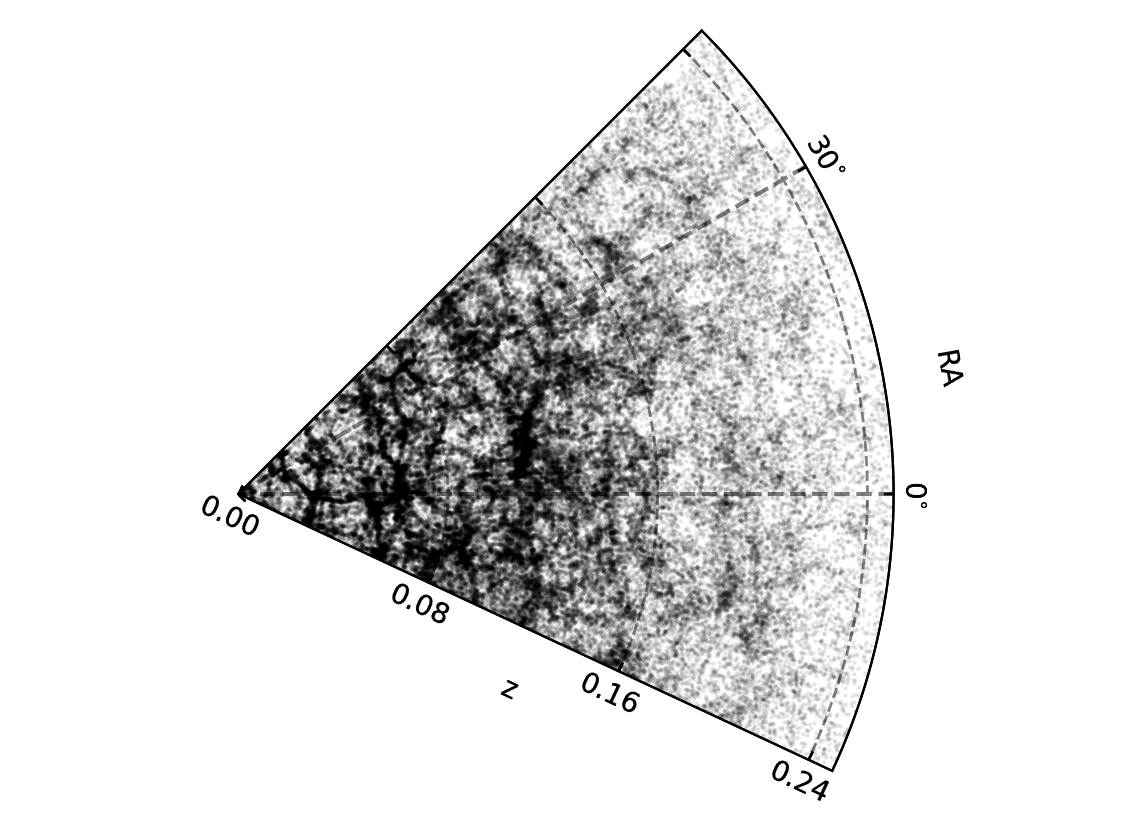

In [62]:
fig = plt.figure(figsize=(7, 5), dpi=200)

ax = fractional_polar_axes(fig, thlim=(-25, 45), rlim=(0, 0.25),
                           step=(30, 0.05), thlabel='RA', rlabel='z')
ax.plot(coords.ra.value, tbl.z, 'k.', alpha=0.1, markersize=1)
fig.savefig('/Users/spardy/Desktop/2df_plot2.png', dpi=600, bbox_inches='tight')

In [52]:
ax2.get_position()

Bbox([[0.342107440301257, 0.125], [0.682892559698743, 0.88]])

(array([ 60537.,  27638.,    980.,      0.,  45045.,  39184.,   5303.,
             0.,   2885.,  64019.]),
 array([  1.25000000e-04,   3.60000958e+01,   7.20000667e+01,
          1.08000037e+02,   1.44000008e+02,   1.79999979e+02,
          2.15999950e+02,   2.51999921e+02,   2.87999892e+02,
          3.23999863e+02,   3.59999833e+02]),
 <a list of 10 Patch objects>)

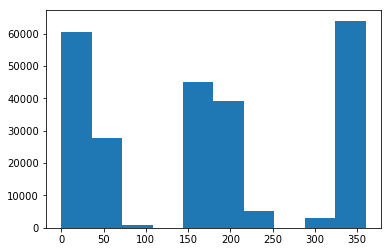

In [32]:
plt.hist(coords.ra.value)